In [10]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

In [11]:
corona_csv = pd.read_csv('time_series_covid19_confirmed_global.csv')
corona_csv.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/13/20,12/14/20,12/15/20,12/16/20,12/17/20,12/18/20,12/19/20,12/20/20,12/21/20,12/22/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,48527,48718,48952,49161,49378,49621,49681,49817,50013,50190
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,48530,49191,50000,50637,51424,52004,52542,53003,53425,53814
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,92102,92597,93065,93507,93933,94371,94781,95203,95659,96069
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,7338,7382,7382,7446,7466,7519,7560,7577,7602,7633
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,16188,16277,16362,16407,16484,16562,16626,16644,16686,16802


In [12]:
corona_csv.drop(['Lat','Long'],axis=1,inplace=True) #deleting "useless" columns

In [14]:
corona_sum = corona_csv.groupby("Country/Region").sum()

In [23]:
corona_sum.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,12/14/20,12/15/20,12/16/20,12/17/20,12/18/20,12/19/20,12/20/20,12/21/20,12/22/20,max infection rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,48718,48952,49161,49378,49621,49681,49817,50013,50190,915.0
Albania,0,0,0,0,0,0,0,0,0,0,...,49191,50000,50637,51424,52004,52542,53003,53425,53814,879.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,92597,93065,93507,93933,94371,94781,95203,95659,96069,1133.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,7382,7382,7446,7466,7519,7560,7577,7602,7633,299.0
Angola,0,0,0,0,0,0,0,0,0,0,...,16277,16362,16407,16484,16562,16626,16644,16686,16802,355.0


In [16]:
corona_sum.shape

(191, 336)

In [17]:
corona_csv.shape

(271, 338)

In [18]:
countries = list(corona_sum.index) #Calculating the maximum infection rate for all countries.
max_infection_rates = []
for c in countries :
    max_infection_rates.append(corona_sum.loc[c].diff().max())
corona_sum['max infection rate'] = max_infection_rates

In [19]:
corona_sum.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,12/14/20,12/15/20,12/16/20,12/17/20,12/18/20,12/19/20,12/20/20,12/21/20,12/22/20,max infection rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,48718,48952,49161,49378,49621,49681,49817,50013,50190,915.0
Albania,0,0,0,0,0,0,0,0,0,0,...,49191,50000,50637,51424,52004,52542,53003,53425,53814,879.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,92597,93065,93507,93933,94371,94781,95203,95659,96069,1133.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,7382,7382,7446,7466,7519,7560,7577,7602,7633,299.0
Angola,0,0,0,0,0,0,0,0,0,0,...,16277,16362,16407,16484,16562,16626,16644,16686,16802,355.0


In [20]:
corona_data = pd.DataFrame(corona_sum['max infection rate']) #creating a new dataframe with only needed max infection rate column

In [21]:
corona_data.head()

,max infection rate
Country/Region,
Afghanistan,915.0
Albania,879.0
Algeria,1133.0
Andorra,299.0
Angola,355.0


In [24]:
happiness_report = pd.read_csv("worldwide_happiness_report.csv")
happiness_report.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [25]:
useless_cols = ['Overall rank','Score','Generosity','Perceptions of corruption'] #drop useless columns
happiness_report.drop(useless_cols,axis=1 , inplace=True)
happiness_report.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


In [26]:
happiness_report.set_index(['Country or region'],inplace=True)

In [27]:
joined_data = happiness_report.join(corona_data).copy()
joined_data.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,max infection rate
Country or region,,,,,
Finland,1.340,1.587,0.986,0.596,840.0
Denmark,1.383,1.573,0.996,0.592,4508.0
Norway,1.488,1.582,1.028,0.603,1680.0
Iceland,1.380,1.624,1.026,0.591,106.0
Netherlands,1.396,1.522,0.999,0.557,13072.0


In [28]:
joined_data.corr()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,max infection rate
GDP per capita,1.000000,0.754906,0.835462,0.379079,0.117133
Social support,0.754906,1.000000,0.719009,0.447333,0.084146
Healthy life expectancy,0.835462,0.719009,1.000000,0.390395,0.089125
Freedom to make life choices,0.379079,0.447333,0.390395,1.000000,-0.090563
max infection rate,0.117133,0.084146,0.089125,-0.090563,1.000000


/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GDP per capita', ylabel='max infection rate'>

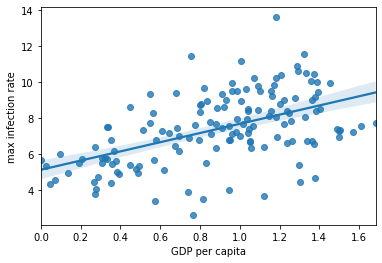

In [29]:
x = joined_data['GDP per capita']
y = joined_data['max infection rate']
sns.regplot(x,np.log(y)) #The correlation between GDP per capita and the infection rate in a country

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Social support', ylabel='max infection rate'>

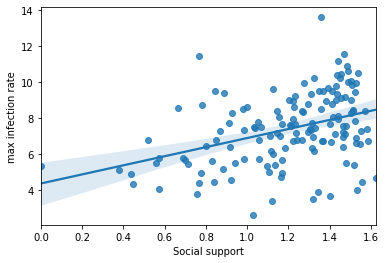

In [31]:
x = joined_data['Social support']
y = joined_data['max infection rate']
sns.regplot(x,np.log(y)) #The correlation between social support and the infection rate in a country

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Healthy life expectancy', ylabel='max infection rate'>

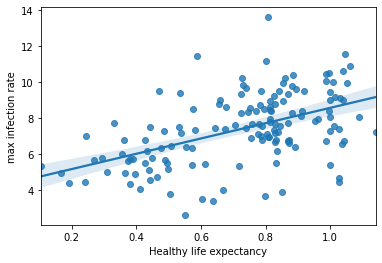

In [32]:
x = joined_data['Healthy life expectancy']
y = joined_data['max infection rate']
sns.regplot(x,np.log(y)) #The correlation between Health life Expectency and the infection rate in a country

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Freedom to make life choices', ylabel='max infection rate'>

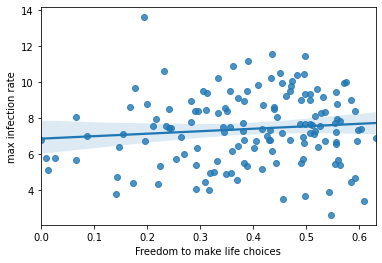

In [33]:
x = joined_data['Freedom to make life choices']
y = joined_data['max infection rate']
sns.regplot(x,np.log(y)) #The correlation between Freedom to make life choices and the infection rate in a country